In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

import sys
sys.path.append('DialogueActClassification')

from dialogue_classification.dataset_utils import load_swda_corpus_data

In [3]:
talks, talk_names, tag_indices, tag_occurances = load_swda_corpus_data('swda/swda/swda')

Loading SwDA Corpus...

Found 43 different utterance tags.

Loaded SwDA Corpus.


In [4]:
len(talks), len(tag_indices)

(1155, 43)

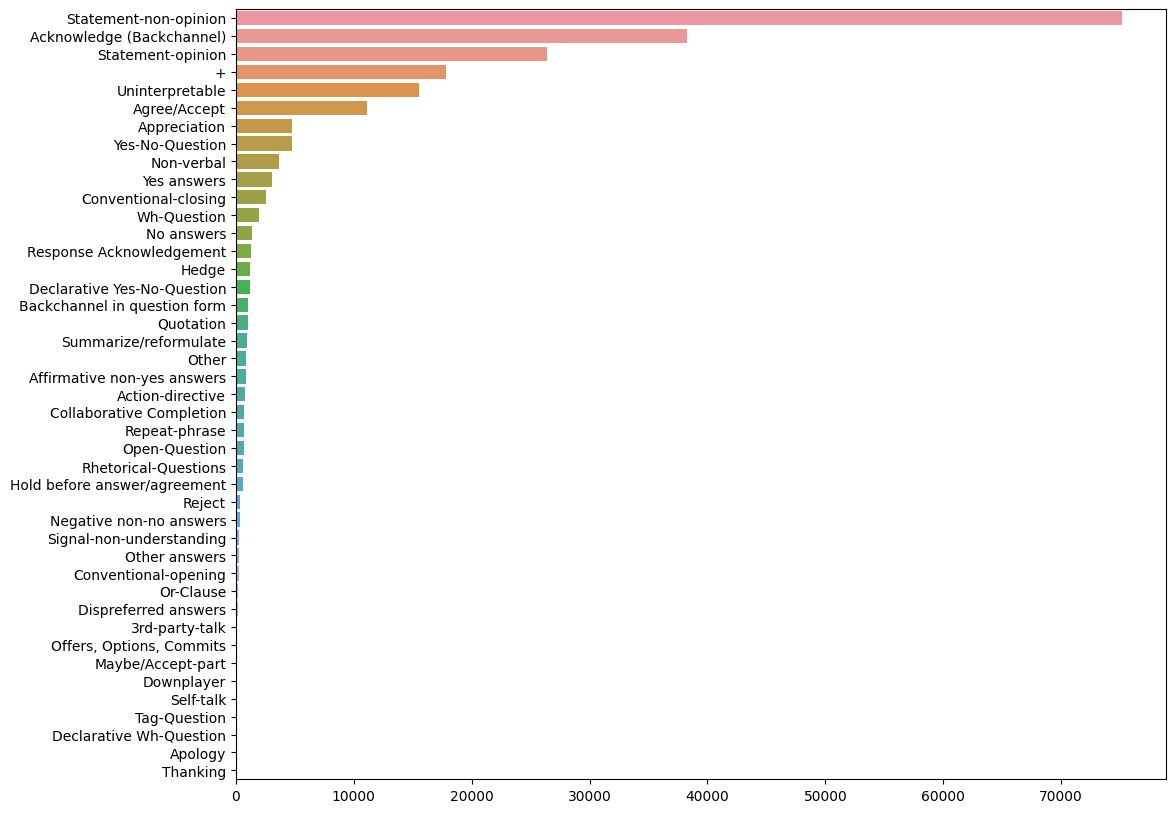

In [5]:
tag_occurances = pd.Series(tag_occurances)
tag_occurances = tag_occurances.sort_values(ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x=tag_occurances.values, y=tag_occurances.index, orient='h');

In [42]:
texts, labels = [], []
for text, label in talks:
    assert len(text) == len(label)
    text = [' '.join(utterance) for utterance in text]
    texts.append(text)
    labels.append(label)

In [43]:
dialogue_lens = pd.Series([len(dialogue) for dialogue in texts])
dialogue_lens.describe()

count    1155.000000
mean      191.875325
std        79.728384
min        38.000000
25%       131.000000
50%       173.000000
75%       240.000000
max       540.000000
dtype: float64

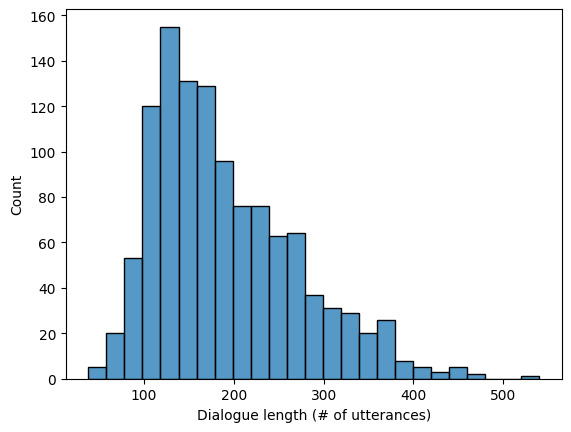

In [48]:
sns.histplot(dialogue_lens)
plt.xlabel("Dialogue length (# of utterances)");

In [49]:
utterance_lens = [len(utterance.split()) for utterance in sum(texts, [])]
utterance_lens = pd.Series(utterance_lens)
utterance_lens.describe()

count    221616.000000
mean          7.057018
std           6.901779
min           0.000000
25%           2.000000
50%           5.000000
75%          10.000000
max          79.000000
dtype: float64

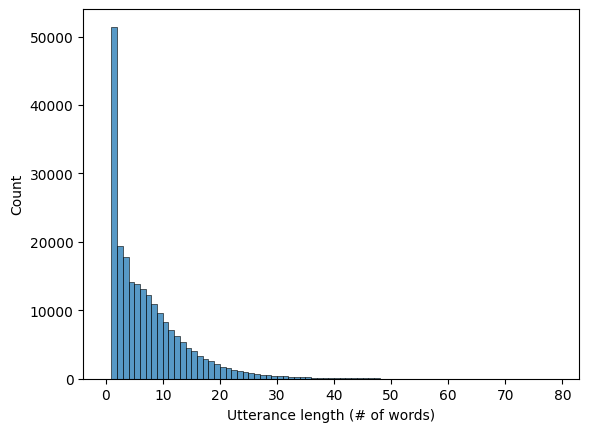

In [51]:
sns.histplot(utterance_lens, binwidth=1)
plt.xlabel("Utterance length (# of words)");

In [53]:
utterances = np.array([utterance for utterance in sum(texts, [])])
utterance_lens = np.array(utterance_lens)

In [57]:
print(utterances[utterance_lens == 1][:10])

['Uh-huh.' 'Uh-huh.' 'Uh-huh.' '<Laughter>.' 'Uh-huh' '<laughter>.'
 'Uh-huh.' 'Uh-huh.' 'Yeah.' 'Yeah.']


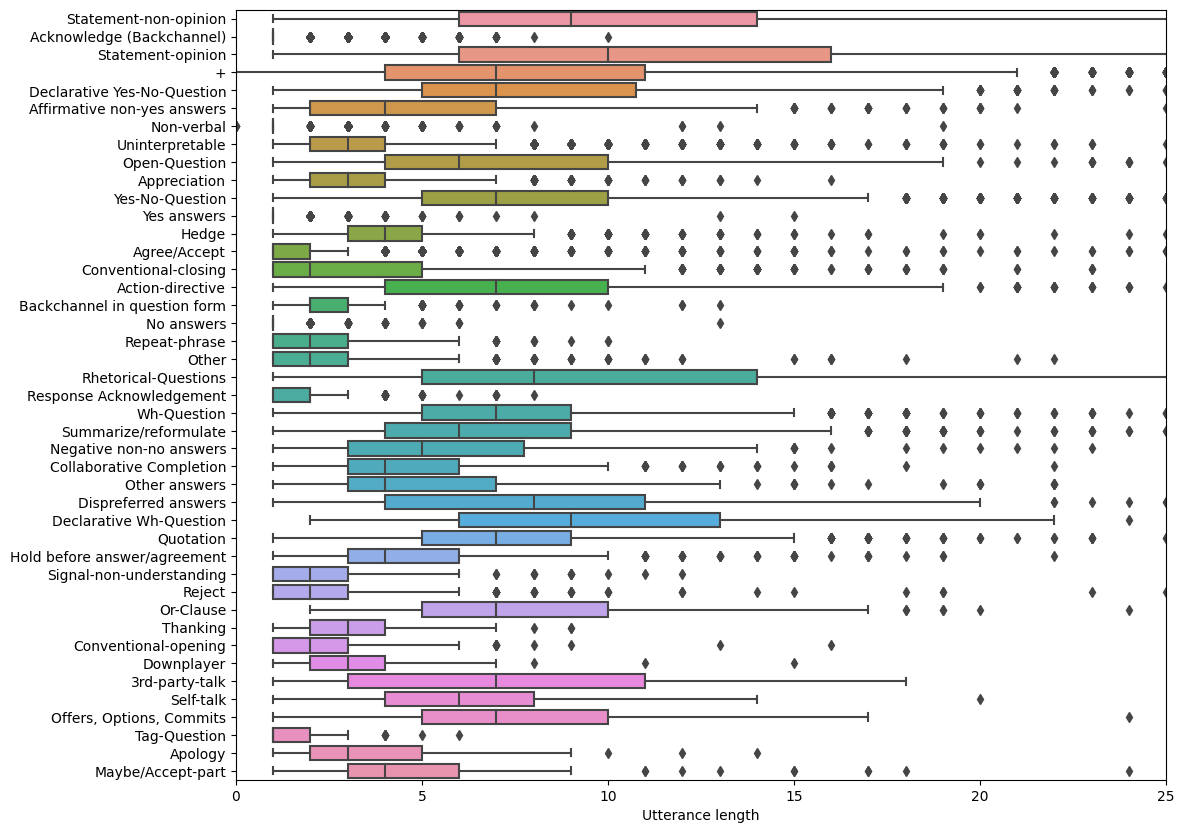

In [95]:
inverse_tag_indices = {v: k for k, v in tag_indices.items()}
all_labels = list(map(lambda x: inverse_tag_indices[x], sum(labels, [])))

plt.figure(figsize=(12, 10))
sns.boxplot(x=utterance_lens, y=all_labels, orient='h')
plt.xlim(0, 25)
plt.xlabel("Utterance length");

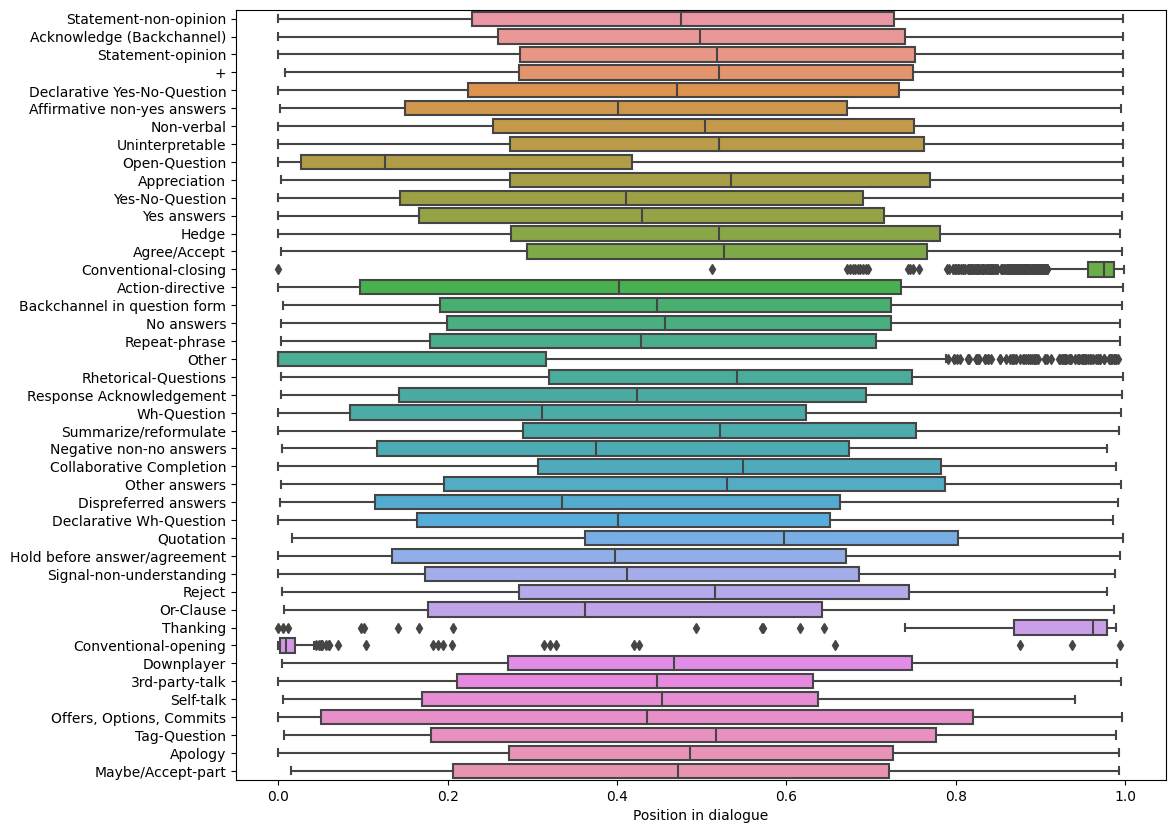

In [96]:
position_in_dialogue = [
    [i / len(dialugue) for i in range(len(dialugue))]
    for dialugue in texts
]

plt.figure(figsize=(12, 10))
sns.boxplot(x=sum(position_in_dialogue, []), y=all_labels, orient='h')
plt.xlabel("Position in dialogue");

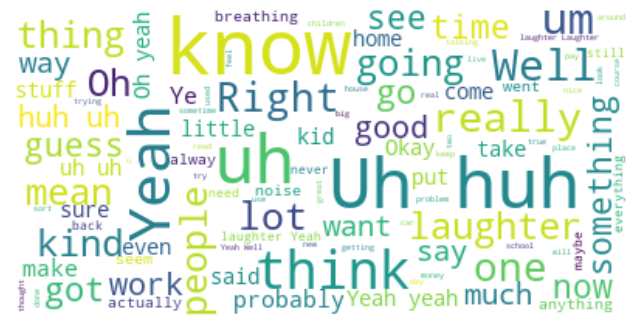

In [111]:
from wordcloud import WordCloud

plt.figure(figsize=(8, 6))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(
    " ".join(utterances)
)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

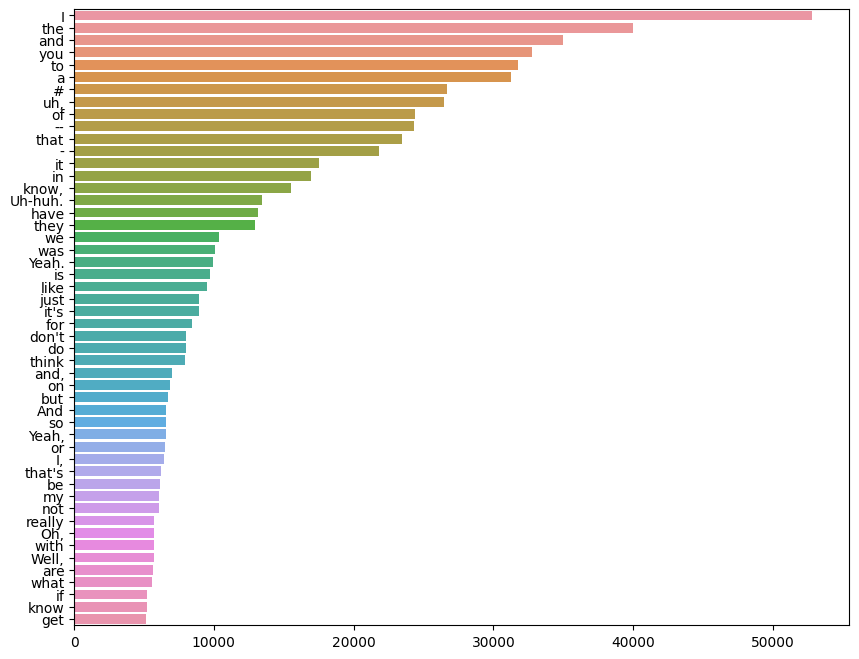

In [121]:
all_words = " ".join(utterances).split()
top_k_words = pd.Series(all_words).value_counts()[:50]

plt.figure(figsize=(10, 8))
sns.barplot(x=top_k_words.values, y=top_k_words.index, orient='h');